# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the training data

In [8]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')
print(dfx.shape,dfy.shape)
#print(dfx.values)

# Connverted into 1D array
x=dfx.values.reshape((-1,))
y=dfy.values.reshape((-1,))
print(x)
print(y)
print(x.shape,y.shape)

(99, 1) (99, 1)
[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]
[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.99

# Preprocessing

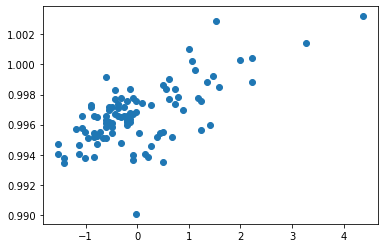

In [32]:
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

# Gradient Descent

In [22]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [10]:
def error(x,y,theta):
    err=0
    for i in range(x.shape[0]):
        hp=hypothesis(x[i],theta)
        err+=(hp-y[i])**2
    return err    

In [18]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hp=hypothesis(x[i],theta)
        grad[0]+=(hp-y[i])
        grad[1]+=(hp-y[i])*x[i]
    return grad

In [39]:
def gradientDescent(x,y,learning_rate=0.001):
    theta=[-2.0,0.0]
    error_list=[]
    theta_list=[]
    for i in range(0,100):
        d=gradient(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        
        theta_list.append(theta)
        theta[0]=theta[0]-learning_rate*d[0]
        theta[1]=theta[1]-learning_rate*d[1]
    return theta,error_list,theta_list

In [40]:
final_values,e,t=gradientDescent(X,Y)
print(final_values)
print(e)
print(t)

[0.9965451981996629, 0.0013578994635963008]
[889.0022181899994, 721.6929337792002, 585.8710893852283, 475.61078028435765, 386.10135109596183, 313.4375069713926, 254.44892564722346, 206.56193633968164, 167.68723053282977, 136.12870548412158, 110.50946329105537, 89.71173685948193, 72.82812174460419, 59.1219861107313, 47.99533149701769, 38.9627021549504, 31.630004622430747, 25.67731343283381, 20.84491277242781, 16.921965083909573, 13.737312227422775, 11.152007853873931, 9.053255178122614, 7.349485657195015, 5.966363856336475, 4.843544195277703, 3.932038071610537, 3.1920764889114044, 2.591374936114669, 2.103724814852725, 1.707849958762157, 1.3864783547129764, 1.1255885651742483, 0.9137979731369208, 0.7418661587304245, 0.6022917398634174, 0.4889850870527625, 0.39700263299441924, 0.32233118480740186, 0.26171282849773325, 0.21250278622718816, 0.17255402470191675, 0.14012358014694076, 0.11379651282676666, 0.09242417324918166, 0.07507408660775863, 0.06098926892216488, 0.04955519984018214, 0.040

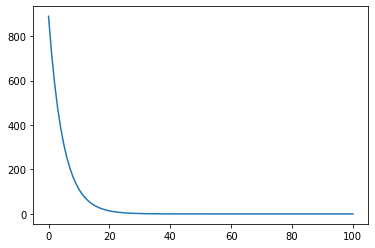

In [41]:
plt.plot(error_list)
plt.show()

In [42]:
xtest=np.linspace(-2,6,10)
xtest

array([-2.        , -1.11111111, -0.22222222,  0.66666667,  1.55555556,
        2.44444444,  3.33333333,  4.22222222,  5.11111111,  6.        ])

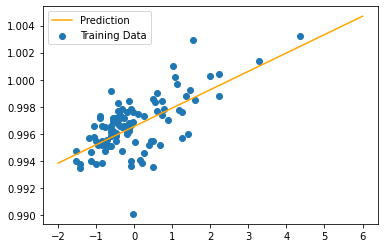

In [43]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_values),color='orange',label="Prediction")
plt.legend()
plt.show()